In [5]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load model and test data
model = joblib.load('../models/churn_model.pkl')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

print("Model and Test data loaded. Ready to evaluate!")

Model and Test data loaded. Ready to evaluate!


In [6]:
y_pred = model.predict(X_test)

# We take the second column [:, 1] which represents the probability of '1' (Churn)
y_probs = model.predict_proba(X_test)[:, 1]

print("Predictions generated.")

Predictions generated.


In [14]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {acc:.2f}")

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Overall Accuracy: 0.79


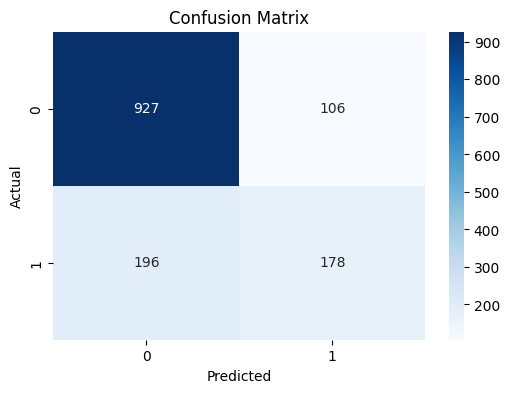

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()